# Housing Pricing Model Project

Learning Project to create a predictive housing price model with python based on existing house pricing data

## Step 1 - import packages

For the project we will be using `pandas`, `numpy`, `matplotlib`, and `seaborn` python packages

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2 - Load the data into a DataFrame

In [149]:
housing_data = pd.read_csv("./housing.csv")

## Step 3 - Explore the data

- Get a Quick view of the data - The Code below returns the first few rows of the data. We do this to get see the structure of the data

In [153]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Check for Missing Values: This step helps us identify if any columns have missing entries, which we might need to handle

In [156]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- Drop any unavailable values from the data and preview it

In [159]:
housing_data.dropna(inplace = True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


- Statistical Summary: This gives an overview of the dataset's numberical features

In [162]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Visualize Relationships: It's helpful to look at the correlations between features and the target variable (price) to see what might be useful for prediction. Use this heatmap to show correlations

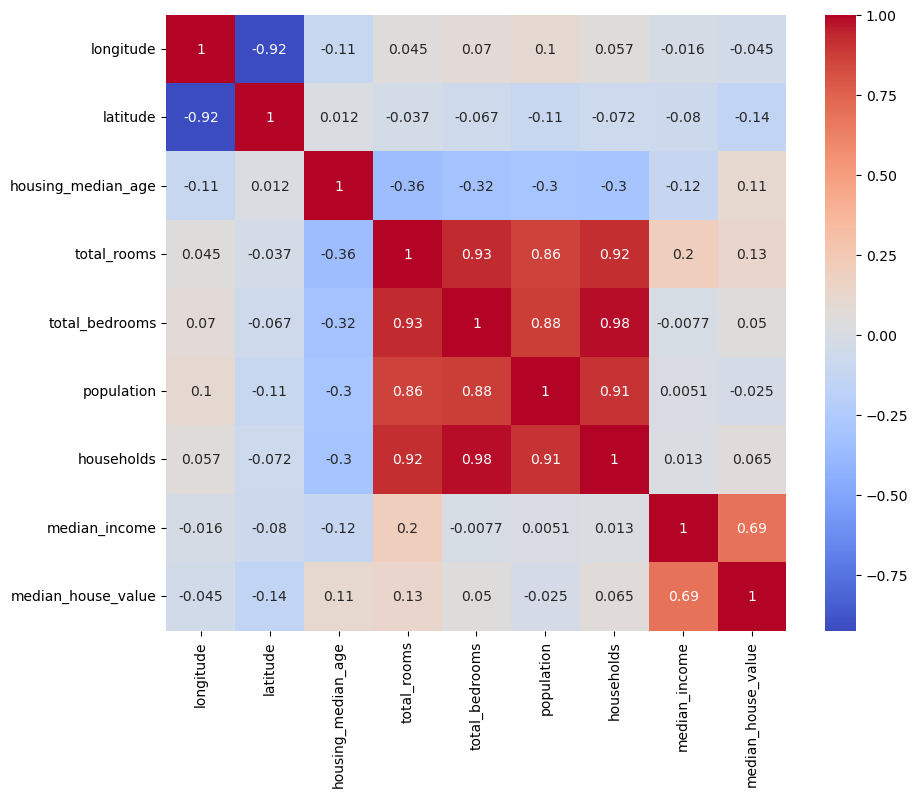

In [165]:
# Select only numberic columns for the correlation matrix
numeric_data = housing_data.select_dtypes(include=[np.number])

# Plot the heatmap with only numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 4: Prepare the Data for Modeling

Based on the heatmap, we choose the columns that seem most relevant for predicting house prices. These are:
- Total Rooms: The `total_rooms` column
- Total BedRooms: The `total_bedrooms` column
- Population: The `population` column
- Households: The `households` column

And we set those columns to the `X` axis, and `price` to the `Y` axis

In [171]:
X = housing_data[['median_income','total_rooms', 'housing_median_age', 'households', 'total_bedrooms', 'population', 'longitude', 'latitude']]
y = housing_data['median_house_value']

Train-Test Split: Split the data to assess the models performance

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Previewing the data

In [177]:
X_test.isnull().sum()

median_income         0
total_rooms           0
housing_median_age    0
households            0
total_bedrooms        0
population            0
longitude             0
latitude              0
dtype: int64

In [179]:
X_test.describe()

,median_income,total_rooms,housing_median_age,households,total_bedrooms,population,longitude,latitude
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,3.873020,2677.342305,28.705407,506.712503,545.120871,1442.372645,-119.531395,35.603834
std,1.905377,2308.508567,12.651445,399.005667,436.667283,1148.380197,1.994034,2.137024
min,0.499900,16.000000,1.000000,3.000000,3.000000,5.000000,-124.210000,32.560000
25%,2.561850,1450.500000,18.000000,279.000000,297.000000,792.000000,-121.660000,33.930000
50%,3.536400,2131.000000,29.000000,415.000000,438.000000,1170.000000,-118.470000,34.250000
75%,4.711150,3192.000000,37.000000,606.000000,651.500000,1738.000000,-118.010000,37.710000
max,15.000100,37937.000000,52.000000,5189.000000,5471.000000,16122.000000,-114.310000,41.860000


In [181]:
X_train.describe()

,median_income,total_rooms,housing_median_age,households,total_bedrooms,population,longitude,latitude
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,3.870697,2626.293466,28.615013,497.613483,536.057751,1420.589991,-119.580513,35.640569
std,1.897825,2153.306818,12.577173,377.997450,417.470689,1129.376716,2.005898,2.136181
min,0.499900,2.000000,1.000000,1.000000,1.000000,3.000000,-124.350000,32.540000
25%,2.564550,1450.000000,18.000000,280.000000,295.250000,787.000000,-121.810000,33.930000
50%,3.536650,2125.000000,29.000000,408.000000,434.000000,1165.000000,-118.510000,34.260000
75%,4.750000,3131.750000,37.000000,603.000000,646.000000,1720.000000,-118.010000,37.720000
max,15.000100,39320.000000,52.000000,6082.000000,6445.000000,35682.000000,-114.470000,41.950000


Drop any non numerical / invalid values from the training and test data, then synchronize the Axes

In [184]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

## Step 5: Train a Linear Regression Model

1. Initialize and Train the Model

In [188]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

2. Get the Linear Regression equation and Make Predictions 

In [191]:
intercept = model.intercept_
coefficients = model.coef_

print("Linear Regression Equation:")
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.2f}) * x{i+1}"
print(equation)

Linear Regression Equation:
y = -3569674.53 + (40293.28) * x1 + (-8.44) * x2 + (1155.10) * x3 + (41.64) * x4 + (115.83) * x5 + (-36.76) * x6 + (-42546.71) * x7 + (-42336.04) * x8


In [193]:
y_pred = model.predict(X_test)

# Step 6 - Evaluate the Model with RMSE (Root Mean Squared Error)

1. **Calculate RMSE**: This metric gives an idea of the average prediction error in the same units as the target variable (price)

In [197]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 70156.12045736384


2. **Check R-Squared**: This metric shows how well the model explains the variance in the data

In [200]:
r2 = r2_score(y_test, y_pred)
print("R-squared", r2)

R-squared 0.6400865688993738


# Step 7 - Visualize the Model's Performance

Plotting True Values vs Predicted Values:

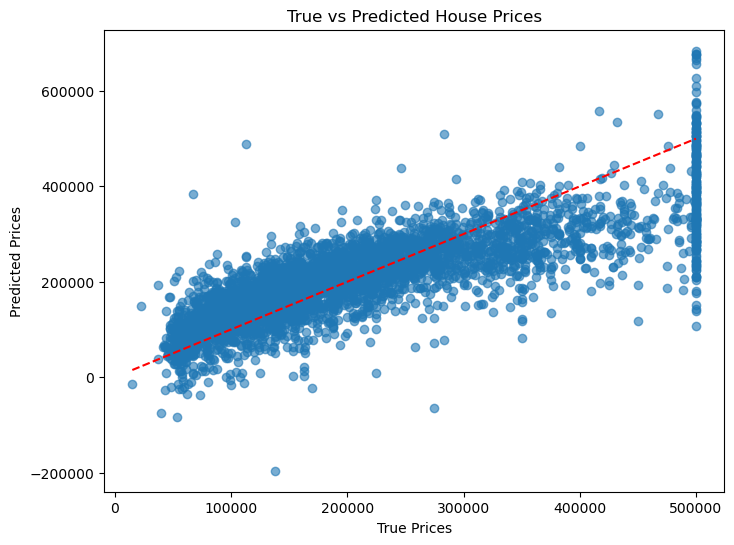

In [204]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted House Prices")
plt.show()

**Plot Residuals**: This plot shows the difference between the true and predicted values. Ideally, residuals should be randomly scattered around zero

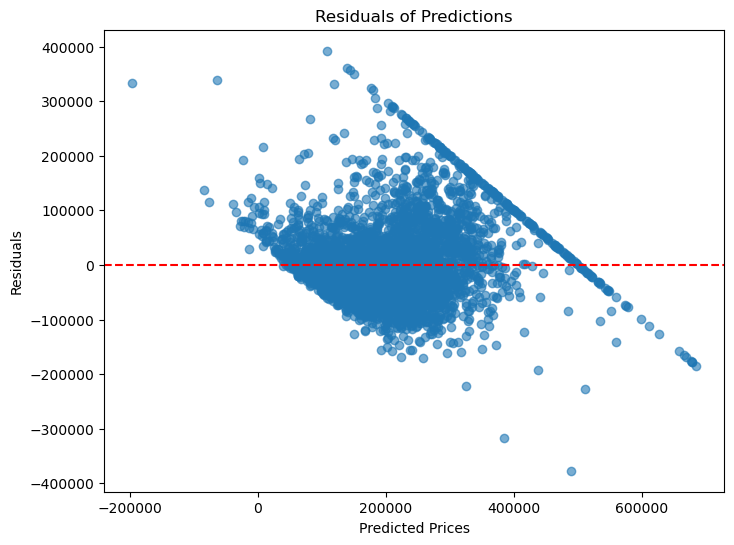

In [207]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals of Predictions")
plt.show()